## Data Collection and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/anniebodyelse/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('/Users/anniebodyelse/Desktop/Portfolio/yield/yield_df.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.shape

(28242, 7)

In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
 df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [14]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [15]:
 df=df.drop(to_drop)

In [16]:
 df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [17]:
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].astype(np.float64)

## Frequency Graph vs Area

<Axes: xlabel='count', ylabel='Area'>

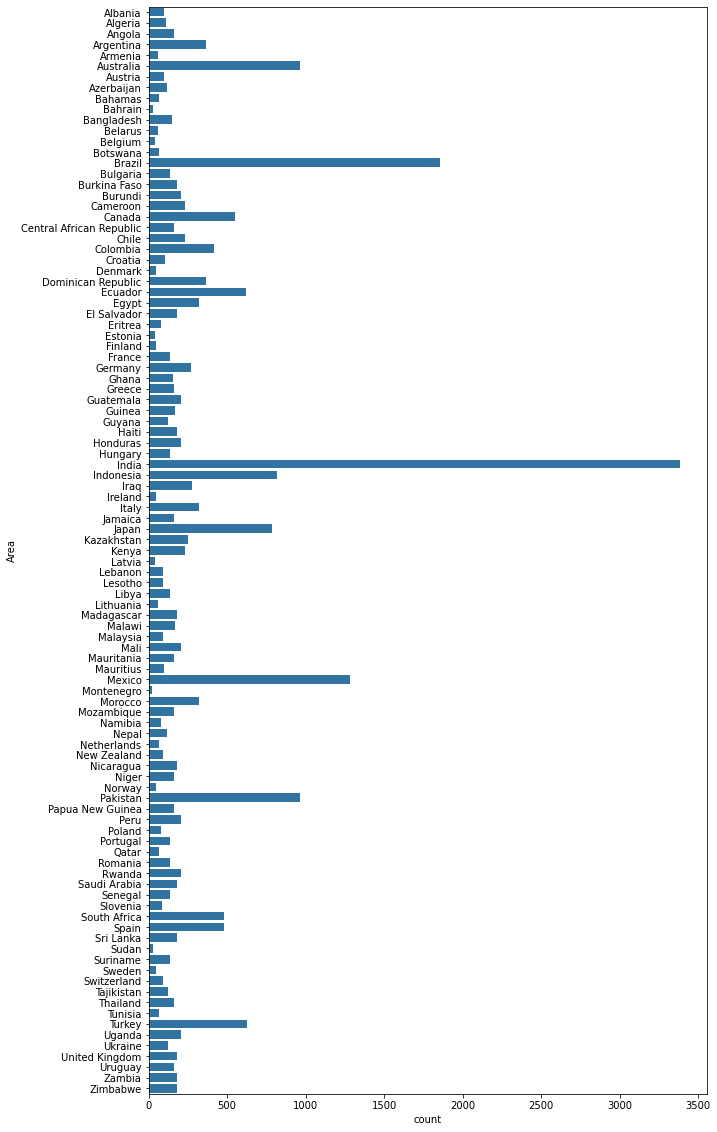

In [18]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

## Yield_per_country

In [19]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [20]:
df['hg/ha_yield'].sum()

1996196943

In [21]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [22]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


## Yield Per Country Graph

<Axes: >

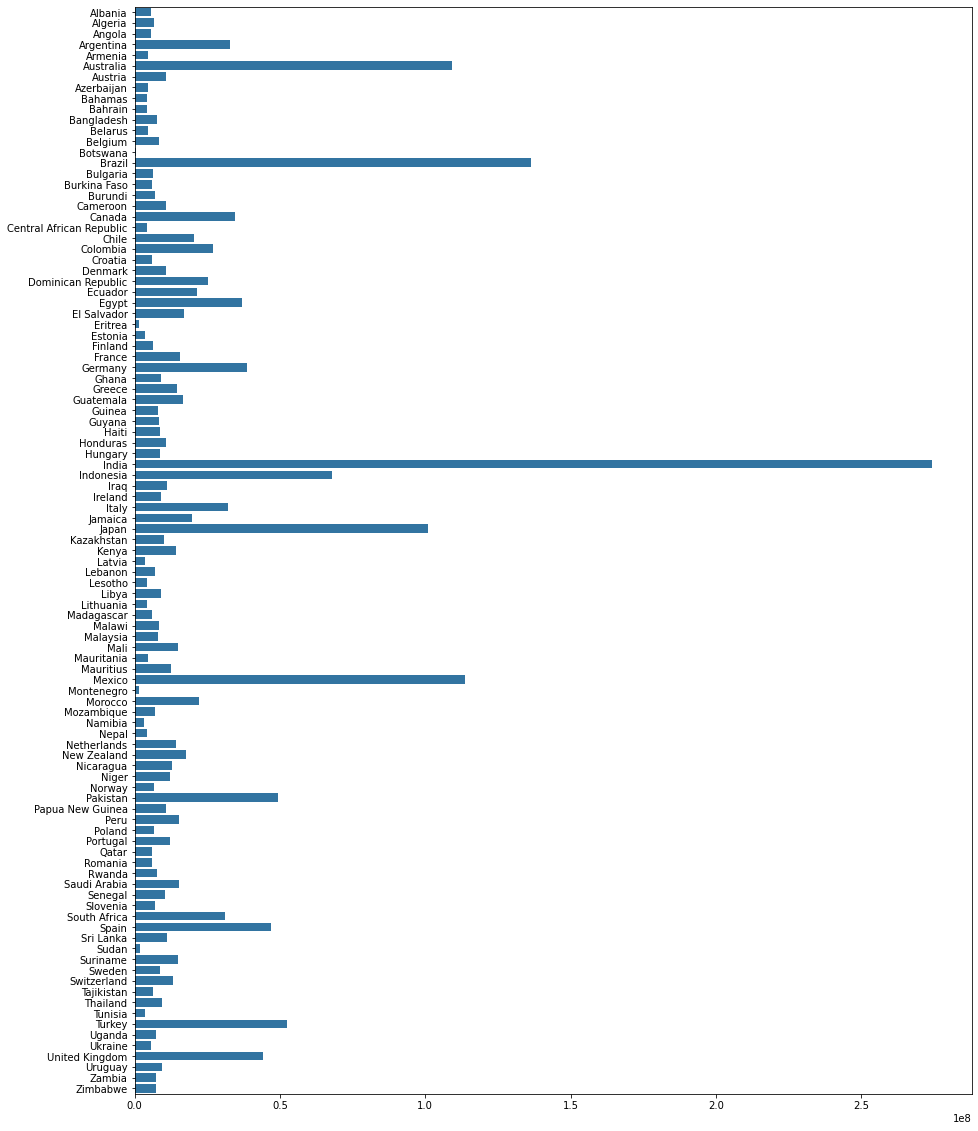

In [23]:
plt.figure (figsize=(15,20))
sns.barplot (y=country, x=yield_per_country)

## Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

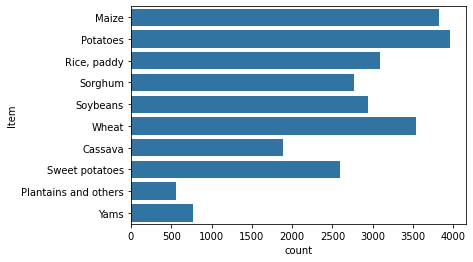

In [24]:
sns.countplot (y=df['Item'])

## Yield vs item

In [25]:
crops = (df['Item'].unique())

In [26]:
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [27]:
yield_per_crop

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

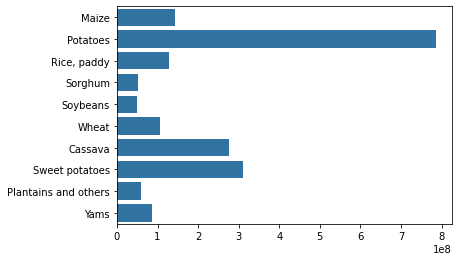

In [28]:
sns.barplot(x=yield_per_crop, y=crops)

## Train test split rearranging columns

In [29]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [30]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
X=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [32]:
X.shape

(25932, 6)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [34]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
4907,2005,608.0,2232.25,8.58,Bulgaria,Soybeans
10399,1995,589.0,7715.00,10.34,Hungary,Wheat
23617,1993,854.0,8985.00,15.33,Portugal,"Rice, paddy"
16174,2012,2051.0,909.71,27.51,Jamaica,Sweet potatoes
9077,2007,700.0,40740.64,10.88,Germany,Maize
...,...,...,...,...,...,...
14326,2012,1083.0,52980.00,25.09,India,Soybeans
21268,2002,1732.0,4170.00,13.28,New Zealand,Maize
10415,1998,589.0,5280.00,10.35,Hungary,Sorghum
11542,1995,1083.0,61257.00,25.92,India,Wheat


In [35]:
y.shape

(25932,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

## converting categorical to numerical and scaling the values

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [38]:
pip install --upgrade scikit-learn numpy

Requirement already up-to-date: scikit-learn in /Users/anniebodyelse/opt/anaconda3/lib/python3.8/site-packages (1.3.2)
Requirement already up-to-date: numpy in /Users/anniebodyelse/opt/anaconda3/lib/python3.8/site-packages (1.24.4)
Note: you may need to restart the kernel to use updated packages.


In [39]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [40]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

## Train the model

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
models={
    'Linear Regression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN':KNeighborsRegressor()
}

for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred=md.predict(X_test_dummy)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")


Linear Regression: mae : 29907.491225521182 score : 0.7473129246907246


/Users/anniebodyelse/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: mae : 29893.99762450549 score : 0.7473261756207235
Ridge: mae : 29864.77860086359 score : 0.7473043620328177
Decision Tree: mae : 3996.478503952188 score : 0.9791336874140111
KNN: mae : 4620.037285521496 score : 0.9849021762487353


## Select model

In [52]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 79048.])

In [53]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [54]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    features=np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]])
    
    transformed_features=preprocesser.transform(features)
    
    predicted_yield=dtr.predict(transformed_features).reshape(1,-1)
    return predicted_yield[0]

## Test the prediction

In [63]:
Year = 1999
average_rain_fall_mm_per_year =1696.0
pesticides_tonnes = 99.0
avg_temp = 17                   
Area = 'Zimbabwe'
Item = 'Cassava'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

/Users/anniebodyelse/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/anniebodyelse/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [64]:
print(result)

[26747.]


## Results and Evaluation

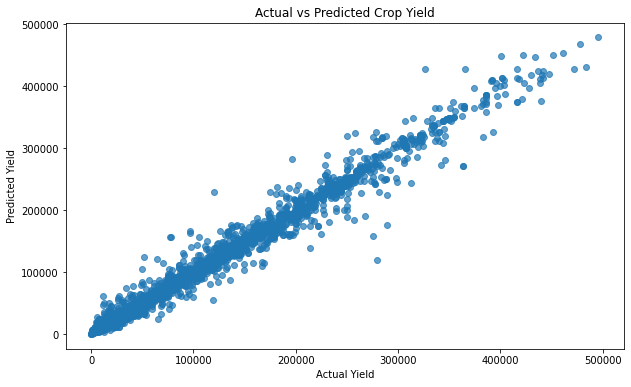

In [65]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.show()